#load depenedencies and dataset


In [2]:
!pip install camel-tools

  Using cached future-1.0.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached docopt-0.6.2.tar.gz (25 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached emoji-2.14.1-py3-none-any.whl.metadata (5.7 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached huggingface_hub-0.30.2-py3-none-any.whl.metadata (13 kB)
  Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 0.5/212.5 MB 4.2 MB/s eta 0:00:51
   ---------------------------------------- 1.3/212.5 MB 3.9 MB/s eta 0:00:54
   ---------------------------------------- 2.1/212.5 MB 4.1 MB/s eta 0:00:52
   ---------------------------------------- 2.6/212.5 MB 3.5 MB/s eta 0:01:00
    --------------------------------------- 3.4/212.5 MB 3.7 MB/s eta 0:00:58
    --------------------------------------- 4.2/212.5 MB 3.

In [3]:
!pip install --upgrade --force-reinstall farasapy

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached charset_normalizer-3.4.1-cp312-cp312-win_amd64.whl.metadata (36 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached charset_normalizer-3.4.1-cp312-cp312-win_amd64.whl (102 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: colorama
    Found existing installation: colorama 0.4.6
    Un

In [1]:
import pandas as pd

train_df = pd.read_csv("train-data-final.csv")
test_df  = pd.read_csv("testing-data-final.csv")


#data  analysis and visualization

In [2]:
# See how many samples
print(f"Training samples: {len(train_df)}")
print(f"Testing samples: {len(test_df)}")

Training samples: 12549
Testing samples: 3000


In [3]:
# Check for missing values
print(train_df.isnull().sum())
print(test_df.isnull().sum())

tweet        1
sarcasm      1
sentiment    1
dialect      1
dtype: int64
tweet        0
sarcasm      0
sentiment    0
dialect      0
dtype: int64


In [4]:
# See label distributions
print(train_df['sarcasm'].value_counts())
print(train_df['sentiment'].value_counts())
print(train_df['dialect'].value_counts())

sarcasm
False    10380
True      2168
Name: count, dtype: int64
sentiment
NEU    5747
NEG    4621
POS    2180
Name: count, dtype: int64
dialect
msa       8562
egypt     2675
gulf       644
levant     624
magreb      43
Name: count, dtype: int64


In [5]:
# See one example
train_df.sample(5)

print("Columns:   ", train_df.columns.tolist())

Columns:    ['tweet', 'sarcasm', 'sentiment', 'dialect']


In [6]:
train_df.head(5)
test_df.head(5)

,tweet,sarcasm,sentiment,dialect
0,اخوي حانق يالغلا وشفيك معصب؟ عادي تراهم بشر يف...,False,NEG,msa
1,اف مو متعوده عليهم سته,True,NEG,msa
2,اللهم اشفِ مرضانا ومرضى المسلمين,False,POS,msa
3,ابشركم طلقت السات,False,POS,gulf
4,مؤشر خطير ٩٠٪ من الشخصيات البرلمانية في الكويت...,True,NEG,msa


In [7]:
print("Train missing values:\n", train_df.isnull().sum())
print("Test missing values:\n",  test_df.isnull().sum())

Train missing values:
 tweet        1
sarcasm      1
sentiment    1
dialect      1
dtype: int64
Test missing values:
 tweet        0
sarcasm      0
sentiment    0
dialect      0
dtype: int64


In [8]:
for col in ["sarcasm", "sentiment", "dialect"]:
    print(f"\nTrain {col} distribution:")
    print(train_df[col].value_counts(normalize=True))


Train sarcasm distribution:
sarcasm
False    0.827223
True     0.172777
Name: proportion, dtype: float64

Train sentiment distribution:
sentiment
NEU    0.458001
NEG    0.368266
POS    0.173733
Name: proportion, dtype: float64

Train dialect distribution:
dialect
msa       0.682340
egypt     0.213181
gulf      0.051323
levant    0.049729
magreb    0.003427
Name: proportion, dtype: float64


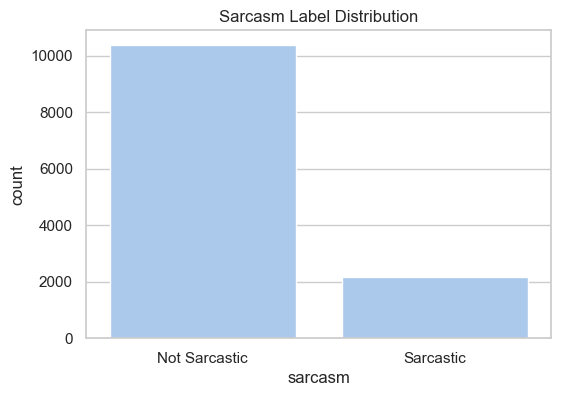

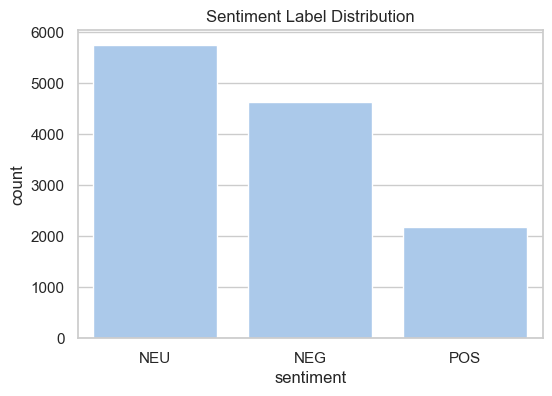

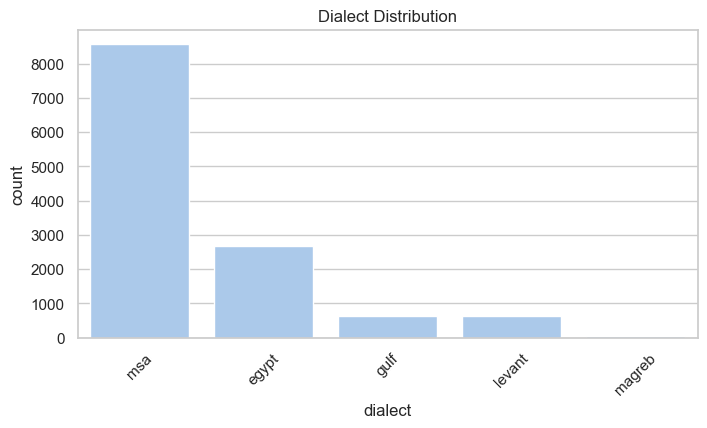

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid", palette="pastel")

# 1. Sarcasm distribution
plt.figure(figsize=(6,4))
sns.countplot(x='sarcasm', data=train_df)
plt.title('Sarcasm Label Distribution')
plt.xticks([0,1], ['Not Sarcastic', 'Sarcastic'])
plt.show()

# 2. Sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=train_df, order=train_df['sentiment'].value_counts().index)
plt.title('Sentiment Label Distribution')
plt.show()

# 3. Dialect distribution
plt.figure(figsize=(8,4))
sns.countplot(x='dialect', data=train_df, order=train_df['dialect'].value_counts().index)
plt.title('Dialect Distribution')
plt.xticks(rotation=45)
plt.show()


#data preprocessing

In [10]:
from camel_tools.utils.dediac import dediac_ar
from camel_tools.utils.normalize import normalize_alef_maksura_ar, normalize_teh_marbuta_ar, normalize_alef_ar
import re

def advanced_arabic_cleaner(text):
    if not isinstance(text, str):
        return ""  # if text is NaN or not string, return empty string

    # 1. Remove diacritics
    text = dediac_ar(text)

    # 2. Normalize Arabic letters
    text = normalize_alef_maksura_ar(text)  # ى -> ي
    text = normalize_alef_ar(text)          # آ, أ, إ -> ا
    text = normalize_teh_marbuta_ar(text)   # ة -> ه
    # Remove diacritics

    text = dediac_ar(text)
    # 3. Remove URLs
    text = re.sub(r"http\S+|www.\S+", "", text)

    # 4. Remove mentions (@username)
    text = re.sub(r"@\S+", "", text)

    # 5. Remove hashtags (#hashtag)
    text = re.sub(r"#\S+", "", text)

    # 6. Keep only Arabic letters and spaces
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)

    # 7. Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()


    return text



In [11]:
train_df['clean_text'] = train_df['tweet'].apply(advanced_arabic_cleaner)
test_df['clean_text'] = test_df['tweet'].apply(advanced_arabic_cleaner)

# Quick look
train_df[['tweet', 'clean_text']].sample(5)


,tweet,clean_text
3498,تبعد وأنا أبعد وتزداد فيني قروبالمملكةللدعم...,تبعد وانا ابعد وتزداد فيني قروبالمملكهللدعمفيص...
11898,الرئيس الروسيفلاديمير بوتين يشرح كيف انشأ ا...,الرئيس الروسيفلاديمير بوتين يشرح كيف انشا اوبا...
9340,إرهابيو جبهة النصرة والفصائل المتحالفة معها يف...,ارهابيو جبهه النصره والفصائل المتحالفه معها يف...
9760,الاعتقالات وباء وانتشر فى مصر والحبس الاحتياطى...,الاعتقالات وباء وانتشر في مصر والحبس الاحتياطي...
1419,ليست لهذه الدرجة لماذا تشويه صورتنا وإظهار ما ...,ليست لهذه الدرجه لماذا تشويه صورتنا واظهار ما ...


In [12]:
# Word2Vec + LSTM Implementation
import numpy as np
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Bidirectional

# 1. Tokenization
# We need to tokenize our Arabic text first
def tokenize_arabic(texts):
    return [text.split() for text in texts]

X_train_tokens = tokenize_arabic(train_df['clean_text'].values)
X_test_tokens = tokenize_arabic(test_df['clean_text'].values)

# 2. Train Word2Vec model
w2v_model = Word2Vec(sentences=X_train_tokens, 
                     vector_size=300,  # Embedding dimension 
                     window=5,         # Context window size
                     min_count=1,      # Ignore words with fewer occurrences
                     workers=4)        # Number of processor cores to use

# 3. Convert tokenized text to sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_tokens)
X_train_seq = tokenizer.texts_to_sequences(X_train_tokens)
X_test_seq = tokenizer.texts_to_sequences(X_test_tokens)

# 4. Pad sequences to fixed length
max_length = 50  # Can be adjusted based on your data
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length)

# 5. Create embedding matrix from Word2Vec
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 300))

for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

# 6. Define multi-task LSTM model
def build_multitask_lstm_model(vocab_size, embedding_matrix, max_length):
    # Shared layers
    input_layer = Input(shape=(max_length,))
    embedding_layer = Embedding(vocab_size, 
                               300, 
                               weights=[embedding_matrix], 
                               input_length=max_length, 
                               trainable=False)(input_layer)
    
    lstm_layer = Bidirectional(LSTM(128, return_sequences=True))(embedding_layer)
    lstm_layer = Bidirectional(LSTM(64))(lstm_layer)
    shared_layer = Dropout(0.5)(lstm_layer)
    
    # Task-specific layers
    # Sarcasm detection (binary)
    sarcasm_output = Dense(64, activation='relu')(shared_layer)
    sarcasm_output = Dense(1, activation='sigmoid', name='sarcasm')(sarcasm_output)
    
    # Sentiment analysis (3 classes)
    sentiment_output = Dense(64, activation='relu')(shared_layer)
    sentiment_output = Dense(3, activation='softmax', name='sentiment')(sentiment_output)
    
    # Dialect identification (3 classes)
    dialect_output = Dense(64, activation='relu')(shared_layer)
    dialect_output = Dense(3, activation='softmax', name='dialect')(dialect_output)
    
    # Create and compile model
    model = Model(inputs=input_layer, 
                 outputs=[sarcasm_output, sentiment_output, dialect_output])
    
    model.compile(
        optimizer='adam',
        loss={
            'sarcasm': 'binary_crossentropy',
            'sentiment': 'sparse_categorical_crossentropy',
            'dialect': 'sparse_categorical_crossentropy'
        },
        metrics={
            'sarcasm': 'accuracy',
            'sentiment': 'accuracy',
            'dialect': 'accuracy'
        }
    )
    
    return model

# 7. Build, train and evaluate the model
model = build_multitask_lstm_model(vocab_size, embedding_matrix, max_length)

# Prepare target values
y_train_sarcasm = train_df['sarcasm_enc'].values
y_train_sentiment = train_df['sentiment_enc'].values
y_train_dialect = train_df['dialect_enc'].values

y_test_sarcasm = test_df['sarcasm_enc'].values
y_test_sentiment = test_df['sentiment_enc'].values
y_test_dialect = test_df['dialect_enc'].values

# Train the model
history = model.fit(
    X_train_padded,
    {
        'sarcasm': y_train_sarcasm,
        'sentiment': y_train_sentiment,
        'dialect': y_train_dialect
    },
    validation_split=0.2,
    epochs=10,
    batch_size=32
)

# Evaluate the model
results = model.evaluate(
    X_test_padded,
    {
        'sarcasm': y_test_sarcasm,
        'sentiment': y_test_sentiment,
        'dialect': y_test_dialect
    }
)

ModuleNotFoundError: No module named 'tensorflow'